In [3]:
import sys
import os
sys.path.append(os.path.abspath("../"))

100000


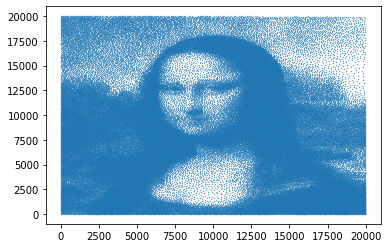

In [4]:
import matplotlib.pyplot as plt

ids = []
x_array = []
y_array = []
with open("../data/raw/mona-lisa100K.tsp", "r") as f:
    for line in f.readlines():
        if line.startswith("EOF"):
            break
        # print(line)
        i, x, y = line.split()
        ids.append(i)
        x_array.append(int(x))
        y_array.append(int(y))
    
    print(len(ids))

plt.scatter(x_array, y_array, s=0.1)

In [10]:
from vrplot import static, animated, util, opt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

import numpy as np
np.random.seed(7)

n_customers = 9
figsize = (8,8)

coords = list(zip(x_array[:10], y_array[:10]))
nodes = list(range(len(coords)))

In [11]:
random_start = np.random.randint(len(nodes))
nn_route = opt.heuristic.get_route_nearest_neighborhood(nodes[1:], coords, start=random_start)
print(f"Starting from: {random_start} - Route: {nn_route}")

Starting from: 4 - Route: ((0, 1, 8, 2, 9, 7, 6, 4, 3, 5, 0), [((4, 3),), ((4, 3, 5),), ((4, 3, 5, 0),), ((4, 3, 5, 0, 1),), ((4, 3, 5, 0, 1, 8),), ((4, 3, 5, 0, 1, 8, 2),), ((4, 3, 5, 0, 1, 8, 2, 9),), ((4, 3, 5, 0, 1, 8, 2, 9, 7),), ((4, 3, 5, 0, 1, 8, 2, 9, 7, 6),), ((0, 1, 8, 2, 9, 7, 6, 4, 3, 5, 0),)])


In [12]:
nn_route, nn_sol_steps = opt.heuristic.get_route_nearest_neighborhood(nodes[1:], coords, start=random_start)

print(f"Starting from: {random_start} - Route: {nn_route}")

animated.show_solutions(
    nn_sol_steps,
    coords,
    nodes)

Starting from: 4 - Route: (0, 1, 8, 2, 9, 7, 6, 4, 3, 5, 0)


In [ ]:
import itertools as it
import numpy as np
n = 4
k = 2
customers = np.arange(4)


# How many subsets are possible?



[list(it.combinations(customers, i)) for i in range(k+1)]

[[()],
 [(0,), (1,), (2,), (3,)],
 [(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]]

In [ ]:
import math
from pprint import pprint
def get_brute_force(customers, n_vehicles=1):
    # Only accept single-digit customer ids
    if np.max(customers) > 9:
        return None
    
    routes = ["".join(c) for c in list(it.permutations(["|"] *(n_vehicles-1) + list(map(str,set(customers)))))]
    return [[tuple(map(int,list(e))) for e in r.split("|")] for r in routes]

get_brute_force([1,2,3,4,5,6,7], n_vehicles=2)

[[(), (1, 2, 3, 4, 5, 6, 7)],
 [(), (1, 2, 3, 4, 5, 7, 6)],
 [(), (1, 2, 3, 4, 6, 5, 7)],
 [(), (1, 2, 3, 4, 6, 7, 5)],
 [(), (1, 2, 3, 4, 7, 5, 6)],
 [(), (1, 2, 3, 4, 7, 6, 5)],
 [(), (1, 2, 3, 5, 4, 6, 7)],
 [(), (1, 2, 3, 5, 4, 7, 6)],
 [(), (1, 2, 3, 5, 6, 4, 7)],
 [(), (1, 2, 3, 5, 6, 7, 4)],
 [(), (1, 2, 3, 5, 7, 4, 6)],
 [(), (1, 2, 3, 5, 7, 6, 4)],
 [(), (1, 2, 3, 6, 4, 5, 7)],
 [(), (1, 2, 3, 6, 4, 7, 5)],
 [(), (1, 2, 3, 6, 5, 4, 7)],
 [(), (1, 2, 3, 6, 5, 7, 4)],
 [(), (1, 2, 3, 6, 7, 4, 5)],
 [(), (1, 2, 3, 6, 7, 5, 4)],
 [(), (1, 2, 3, 7, 4, 5, 6)],
 [(), (1, 2, 3, 7, 4, 6, 5)],
 [(), (1, 2, 3, 7, 5, 4, 6)],
 [(), (1, 2, 3, 7, 5, 6, 4)],
 [(), (1, 2, 3, 7, 6, 4, 5)],
 [(), (1, 2, 3, 7, 6, 5, 4)],
 [(), (1, 2, 4, 3, 5, 6, 7)],
 [(), (1, 2, 4, 3, 5, 7, 6)],
 [(), (1, 2, 4, 3, 6, 5, 7)],
 [(), (1, 2, 4, 3, 6, 7, 5)],
 [(), (1, 2, 4, 3, 7, 5, 6)],
 [(), (1, 2, 4, 3, 7, 6, 5)],
 [(), (1, 2, 4, 5, 3, 6, 7)],
 [(), (1, 2, 4, 5, 3, 7, 6)],
 [(), (1, 2, 4, 5, 6, 3, 7)],
 [(), (1, 

In [ ]:
import math
from pprint import pprint
routes = ["".join(c) for c in sorted(list(set(it.permutations(["|", "1","2","3"]))))]
routes

['123|',
 '12|3',
 '132|',
 '13|2',
 '1|23',
 '1|32',
 '213|',
 '21|3',
 '231|',
 '23|1',
 '2|13',
 '2|31',
 '312|',
 '31|2',
 '321|',
 '32|1',
 '3|12',
 '3|21',
 '|123',
 '|132',
 '|213',
 '|231',
 '|312',
 '|321']

In [ ]:
print(len(routes))
print(math.factorial(3) * math.factorial(2))
pprint(routes)

24
12
['123|',
 '12|3',
 '132|',
 '13|2',
 '1|23',
 '1|32',
 '213|',
 '21|3',
 '231|',
 '23|1',
 '2|13',
 '2|31',
 '312|',
 '31|2',
 '321|',
 '32|1',
 '3|12',
 '3|21',
 '|123',
 '|132',
 '|213',
 '|231',
 '|312',
 '|321']


In [ ]:
from pprint import pprint
div = set()
for r in routes:
    s = r.split("|")
    a = map(set, list(map(list, s)))
    print(list(a))
    #t = tuple([frozenset(map(int, e)) for e in list(a)])
    #print(t)
    #div.add(t)
    #print(t)
#list_div = sorted([tuple(["".join(map(str,i)) for i in list(map(list, e))]) for e in list(div)])
#print(len(list_div))
#pprint(list_div)

[{'3', '2', '1'}, set()]
[{'2', '1'}, {'3'}]
[{'3', '2', '1'}, set()]
[{'3', '1'}, {'2'}]
[{'1'}, {'3', '2'}]
[{'1'}, {'3', '2'}]
[{'3', '2', '1'}, set()]
[{'2', '1'}, {'3'}]
[{'3', '2', '1'}, set()]
[{'3', '2'}, {'1'}]
[{'2'}, {'3', '1'}]
[{'2'}, {'3', '1'}]
[{'3', '2', '1'}, set()]
[{'3', '1'}, {'2'}]
[{'3', '2', '1'}, set()]
[{'3', '2'}, {'1'}]
[{'3'}, {'2', '1'}]
[{'3'}, {'2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
[set(), {'3', '2', '1'}]
